In [87]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [75]:
from qiskit_nature.units import DistanceUnit
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms.minimum_eigensolvers import VQE, NumPyMinimumEigensolver, MinimumEigensolverResult
from qiskit.primitives import Estimator

from qiskit_nature import settings
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import ParityMapper

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

In [76]:
# running this driver to find the hamiltonaian 
# then mapping the hamiltonian into second quantzaation 
# using Parity Maper to make the elctrionic second quanti hamil to qbit hamiltonain
# seting up ansat first initial HF state 
# paramaterised ansat of UCSSD 

# using optimizer such as COBYLA, 
# using estimator and then vqe 
# iterating the VQE to find minimum state.



problem  = driver.run()
hamiltonian = problem.hamiltonian.second_q_op()

In [77]:


qubit_mapper = ParityMapper(num_particles = problem.num_particles)
qubit_hamiltonian = qubit_mapper.map(hamiltonian)


#preparing an ansat
initial_state = HartreeFock(num_spatial_orbitals = problem.num_spatial_orbitals, num_particles = problem.num_particles, qubit_mapper = qubit_mapper)
ansatz = UCCSD(num_spatial_orbitals = problem.num_spatial_orbitals, num_particles = problem.num_particles, qubit_mapper = qubit_mapper, initial_state = initial_state)

In [81]:
optimizer = COBYLA(maxiter = 1000)
estimator = Estimator()

energies = []
def callback(nfev, x, fx, *args):
    energies.append(fx)
    
vqe = VQE(estimator, ansatz, optimizer, callback = callback)


result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)
result = problem.interpret(result)
vqe_energy = result.total_energies[0]

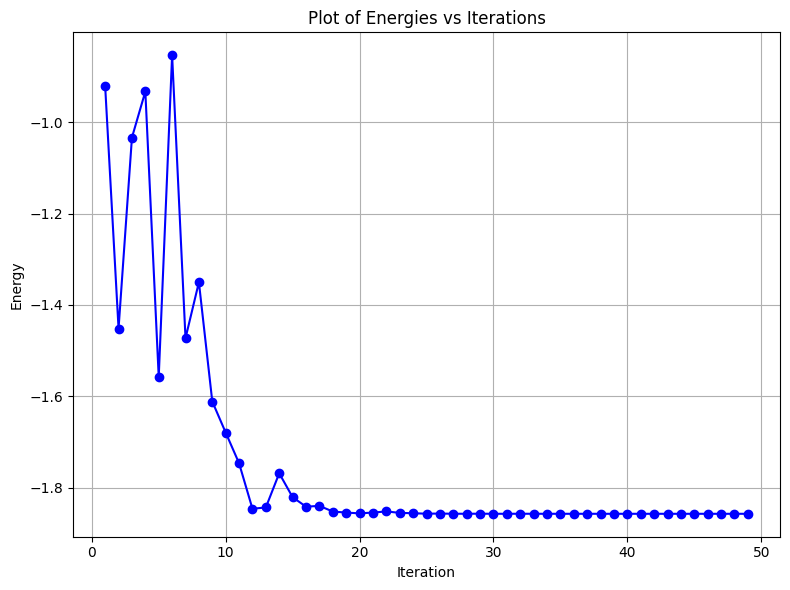

In [83]:
import matplotlib.pyplot as plt
iterations = range(1, len(energies) + 1)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(iterations, energies, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Plot of Energies vs Iterations')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()